### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

BoomBikes, a US bike-sharing company, is facing significant revenue decline due to the COVID-19 pandemic. To recover and thrive post-pandemic, they aim to understand and predict the demand for shared bikes in the American market.

#### Objective:

1. Identify key factors influencing bike-sharing demand.
2. Build a predictive model to estimate bike demand based on these factors.

### Import Necessary Libraries

In [429]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Extra - To Suppress warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodels
import statsmodels.api as sm

# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike Sharing dataset

In [705]:
bike = pd.read_csv("day.csv")
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [706]:
# Get shape of the dataset
bike.shape

(730, 16)

In [707]:
# Show info of the dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [708]:
# Describe of the dataset
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

#### Finding
This dataset have 730 rows and 16 columns.

One column has 'object' datatype and others have either 'int64' or 'float64' datatypes.

Some variables are categorical in nature.

### Data Quality Check

Check for NULL/Missing values

In [709]:
# Check for missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#####  Check for duplicate rows in dateset

In [710]:
round((bike.isnull().sum(axis=1)/len(bike))*100, 2).sort_values(ascending = False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

Bike dataset don't have any null/missing values in rows/columns

### Data Cleaning and Preparation

Checking value_counts() for the dataset to identify if any column have junk/unknown values. If any column have junk/unknown values then we have to drop these columns.

In [711]:
bike_dummy = bike.iloc[:, 1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=True), '\n\n')

01-01-2018    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
30-04-2019    1
             ..
04-09-2018    1
05-09-2018    1
06-09-2018    1
08-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 


4    178
1    180
2    184
3    188
Name: season, dtype: int64 


0    365
1    365
Name: yr, dtype: int64 


2     56
4     60
6     60
9     60
11    60
1     62
3     62
5     62
7     62
8     62
10    62
12    62
Name: mnth, dtype: int64 


1     21
0    709
Name: holiday, dtype: int64 


3    103
2    104
4    104
5    104
6    105
0    105
1    105
Name: weekday, dtype: int64 


0    231
1    499
Name: workingday, dtype: int64 


3     21
2    246
1    463
Name: weathersit, dtype: int64 


14.110847    1
15.033347    1
11.445847    1
16.707500    1
18.620847    1
            ..
19.850847    4
26.615847    4
23.130847    4
10.899153    5
26.035000    5
Name: temp, Length: 498, dtype: int64 


18.18125    1
28.69375    1
30.74625    1
29.92435    1
22.85190    1
   

After analysis using value_counts() method we have found that there is not any junk/unknown values in any coulmns of the dataset.

#### Removing unknown and redundent columns

1. **instant**: This column is a index column of the dataset.

2. **dteday**: This is the date column but we already have 'yr', 'mnth' coulmns. So we can drop this column.

3. **casual & registered**: After analysing data dictionary, we can understand that this two columns don't have any role because we need to find total count of the bikes and not by specific category.

In [712]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [713]:
# Drop 'instant' from the bike dataframe.
bike = bike.drop('instant', axis = 1)
bike.head()

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  01-01-2018       1   0     1        0        6           0           2   
1  02-01-2018       1   0     1        0        0           0           2   
2  03-01-2018       1   0     1        0        1           1           1   
3  04-01-2018       1   0     1        0        2           1           1   
4  05-01-2018       1   0     1        0        3           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [714]:
# Drop 'dteday' from the bike dataframe.
bike = bike.drop('dteday', axis = 1)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [715]:
# Drop 'casual' from the bike dataframe.
bike = bike.drop('casual', axis = 1)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  registered   cnt  
0  18.18125  80.5833  10.749882         654   985  
1  17.68695  69.6087  16.652113         670   801  
2   9.47025  43.7273  16.636703        1229  1349  
3  10.60610  59.0435  10.739832        1454  1562  
4  11.46350  43.6957  12.522300        1518  1600

In [716]:
# Drop 'registered' from the bike dataframe.
bike = bike.drop('registered', axis = 1)
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Univariate Analysis

Season status
Season 1: 24.65753424657534
Season 2: 25.205479452054796
Season 3: 25.753424657534246
Season 4: 24.383561643835616


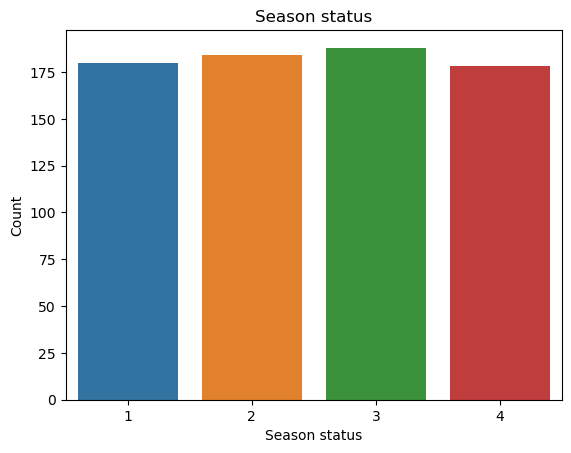

In [717]:
# Season status
print("Season status")
seasons = bike['season'].unique()
seasons = sorted(seasons)
for season in seasons:
    print(f"Season {season}: {len(bike[bike['season'] == season])/len(bike['season'])*100}")

season = sns.countplot(x = 'season', data = bike)
season.set_title('Season status')
season.set_xlabel('Season status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that season data are almost equaly distributed in "Spring", "Summer", "Fall" and "Winter" seasons.

Year status
Year 2018: 50.0
Year 2019: 50.0


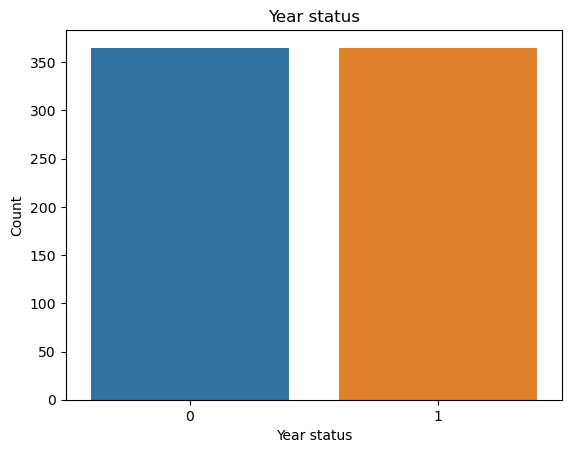

In [718]:
# Year status
print("Year status")
print(f"Year 2018: {len(bike[bike['yr'] == 0])/len(bike['yr'])*100}")
print(f"Year 2019: {len(bike[bike['yr'] == 1])/len(bike['yr'])*100}")

season = sns.countplot(x = 'yr', data = bike)
season.set_title('Year status')
season.set_xlabel('Year status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that year data are equaly distributed in 2018 and 2019.

Month status
Month 1: 8.493150684931507
Month 2: 7.671232876712329
Month 3: 8.493150684931507
Month 4: 8.21917808219178
Month 5: 8.493150684931507
Month 6: 8.21917808219178
Month 7: 8.493150684931507
Month 8: 8.493150684931507
Month 9: 8.21917808219178
Month 10: 8.493150684931507
Month 11: 8.21917808219178
Month 12: 8.493150684931507


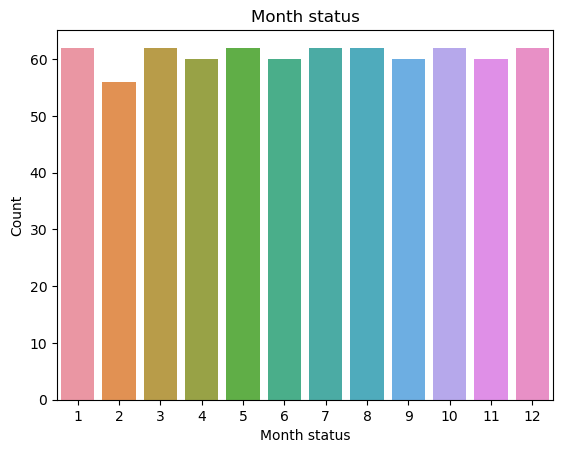

In [719]:
# Month status
print("Month status")
months = bike['mnth'].unique()
months = sorted(months)
for month in months:
    print(f"Month {month}: {len(bike[bike['mnth'] == month])/len(bike['mnth'])*100}")

season = sns.countplot(x = 'mnth', data = bike)
season.set_title('Month status')
season.set_xlabel('Month status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses frequancies is almost same in all months except Feburary month. In Feburary month bike uses is lower than other months. 

Holiday status
No Holiday: 97.12328767123287
Holiday: 2.8767123287671232


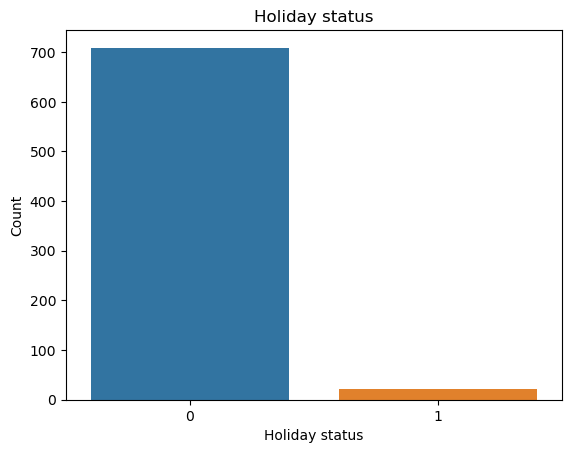

In [720]:
# Holiday status
print("Holiday status")
print(f"No Holiday: {len(bike[bike['holiday'] == 0])/len(bike['holiday'])*100}")
print(f"Holiday: {len(bike[bike['holiday'] == 1])/len(bike['holiday'])*100}")

season = sns.countplot(x = 'holiday', data = bike)
season.set_title('Holiday status')
season.set_xlabel('Holiday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses is maximum (97.12%) when there is no holiday but bike uses is minimum(2.87%) when there is holiday.

Weekday status
Weekday 0: 14.383561643835616
Weekday 1: 14.383561643835616
Weekday 2: 14.246575342465754
Weekday 3: 14.10958904109589
Weekday 4: 14.246575342465754
Weekday 5: 14.246575342465754
Weekday 6: 14.383561643835616


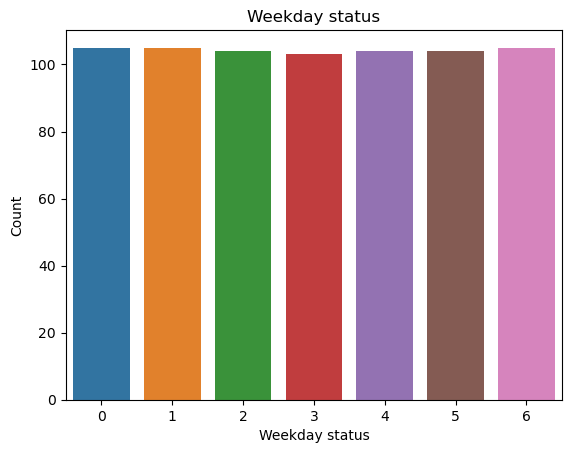

In [721]:
# Weekday status
print("Weekday status")
weekdays = bike['weekday'].unique()
weekdays = sorted(weekdays)
for weekday in weekdays:
    print(f"Weekday {weekday}: {len(bike[bike['weekday'] == weekday])/len(bike['weekday'])*100}")

season = sns.countplot(x = 'weekday', data = bike)
season.set_title('Weekday status')
season.set_xlabel('Weekday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses on every weekday are simillar approx(14%).

Workingday status
Workingday 0: 31.643835616438352
Workingday 1: 68.35616438356165


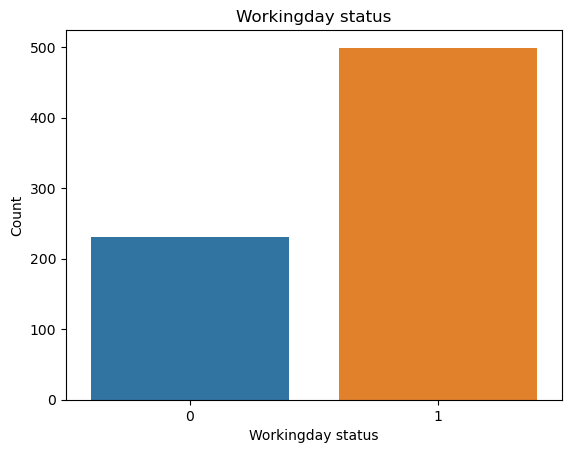

In [722]:
# Workingday status
print("Workingday status")
workingdays = bike['workingday'].unique()
workingdays = sorted(workingdays)
for workingday in workingdays:
    print(f"Workingday {workingday}: {len(bike[bike['workingday'] == workingday])/len(bike['workingday'])*100}")

season = sns.countplot(x = 'workingday', data = bike)
season.set_title('Workingday status')
season.set_xlabel('Workingday status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bike uses on working day is almost double(68%) than non-working days(31%).

Weathersit status
Weathersit 1: 63.42465753424658
Weathersit 2: 33.6986301369863
Weathersit 3: 2.8767123287671232


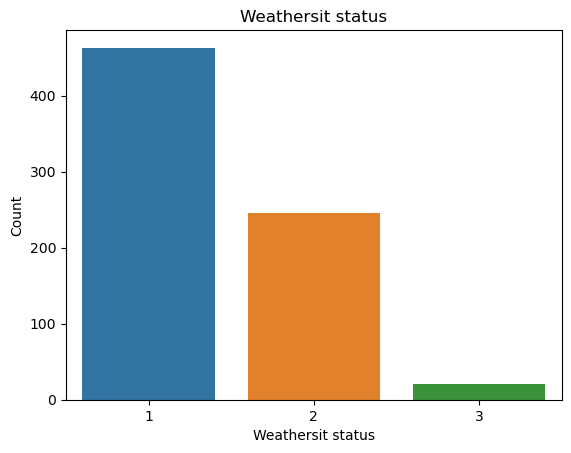

In [723]:
# weathersit status
print("Weathersit status")
weathersits = bike['weathersit'].unique()
weathersits = sorted(weathersits)
for weathersit in weathersits:
    print(f"Weathersit {weathersit}: {len(bike[bike['weathersit'] == weathersit])/len(bike['weathersit'])*100}")

season = sns.countplot(x = 'weathersit', data = bike)
season.set_title('Weathersit status')
season.set_xlabel('Weathersit status')
season.set_ylabel('Count')
plt.show()

##### Analysis shows that bikes are in used when weather condition was either "mixed clouds" or "misty".

Temp status


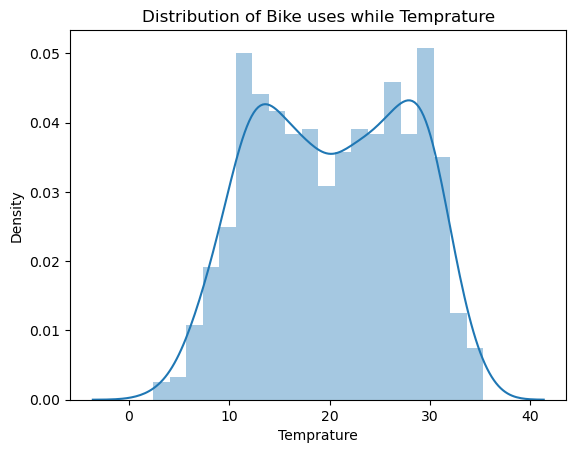

In [724]:
# Temp status
print("Temp status")
ls = sns.distplot(bike['temp'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Temprature')
ls.set_xlabel('Temprature')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when temprature was between 10 to 30.

Feeling Temprature status


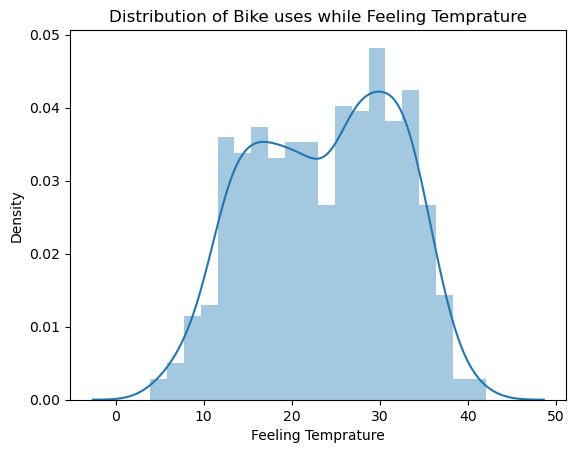

In [725]:
# Feeling Temprature status
print("Feeling Temprature status")
ls = sns.distplot(bike['atemp'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Feeling Temprature')
ls.set_xlabel('Feeling Temprature')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when feeling temprature in Celsius was between 15 to 35.

Humidity status


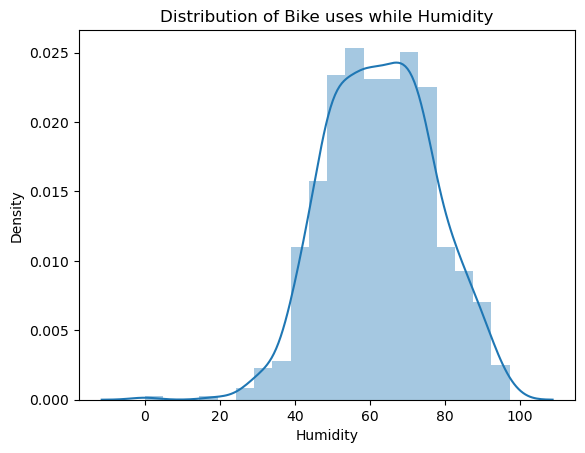

In [726]:
# Humidity status
print("Humidity status")
ls = sns.distplot(bike['hum'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Humidity')
ls.set_xlabel('Humidity')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when humidity was between 40 to 85.


Windspeed status


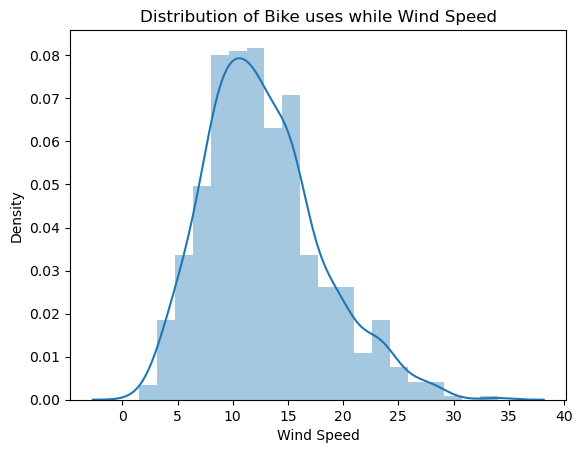

In [727]:
# Windspeed status
print("Windspeed status")
ls = sns.distplot(bike['windspeed'], kde=True, bins=20)
ls.set_title('Distribution of Bike uses while Wind Speed')
ls.set_xlabel('Wind Speed')
ls.set_ylabel('Density')
plt.show()

##### Analysis shows that bikes are mostly in used when wind speed was between 5 to 20.

## Bivariate Analysis

In this part of Analysis, lets find out if there is a relationship between two sets of values.
We will do bivariate analysis of each of independent variables(season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed) with dependent variable **cnt** (count of total rental bikes including both casual and registered).

### Bivariate Analysis of Season against count of total rental bikes

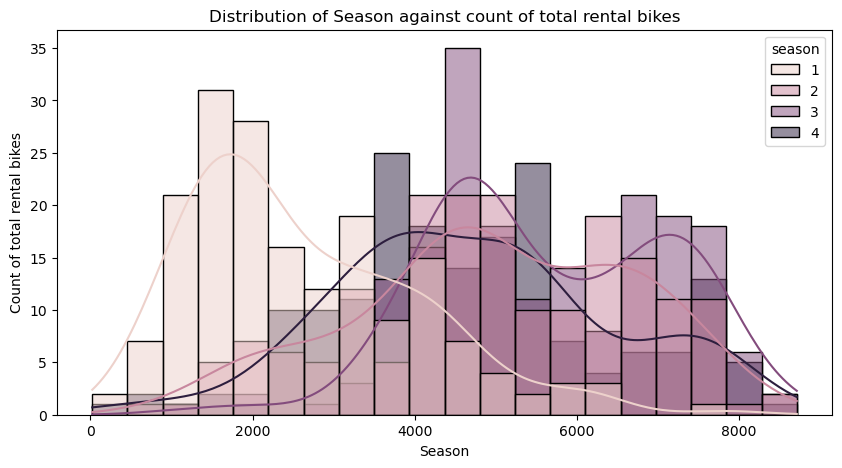

In [728]:
# Distribution of Season against count of total rental bikes
plt.figure(figsize=(10,5))
sns.histplot(data=bike, x='cnt', hue='season',  kde=True, bins=20)
plt.title('Distribution of Season against count of total rental bikes')
plt.xlabel('Season')
plt.ylabel('Count of total rental bikes')
plt.show()

<Figure size 1000x500 with 0 Axes>

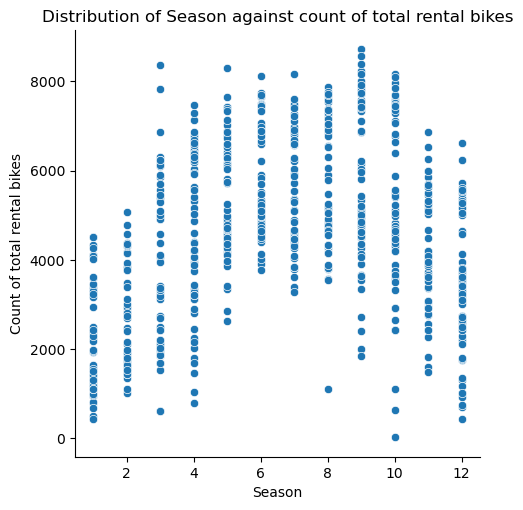

In [729]:
# Distribution of Season against count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x="mnth", y="cnt")
plt.title('Distribution of Season against count of total rental bikes')
plt.xlabel('Season')
plt.ylabel('Count of total rental bikes')
plt.show()

<Figure size 1000x500 with 0 Axes>

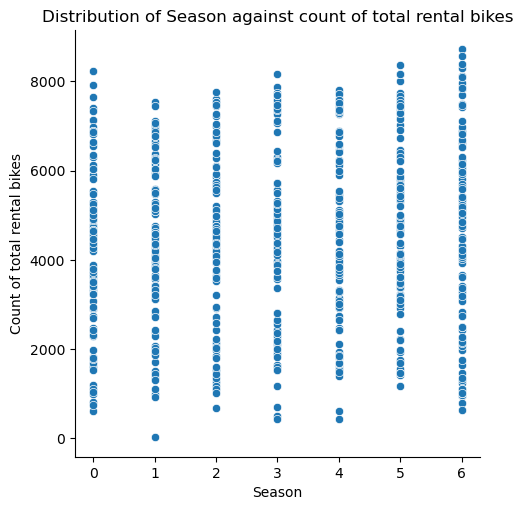

In [730]:
# Distribution of Season against count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x="weekday", y="cnt")
plt.title('Distribution of Season against count of total rental bikes')
plt.xlabel('Season')
plt.ylabel('Count of total rental bikes')
plt.show()

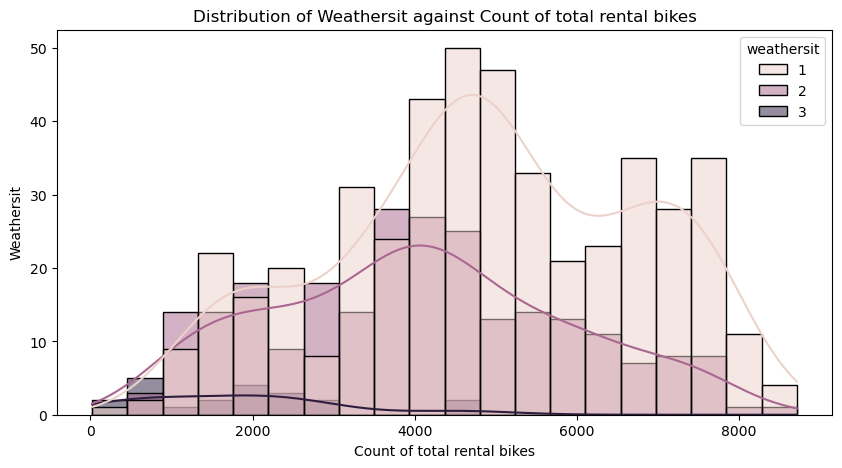

In [731]:
# Distribution of Weathersit against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.histplot(data=bike, x='cnt', hue='weathersit',  kde=True, bins=20)
plt.title('Distribution of Weathersit against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Weathersit')
plt.show()

<Figure size 1000x500 with 0 Axes>

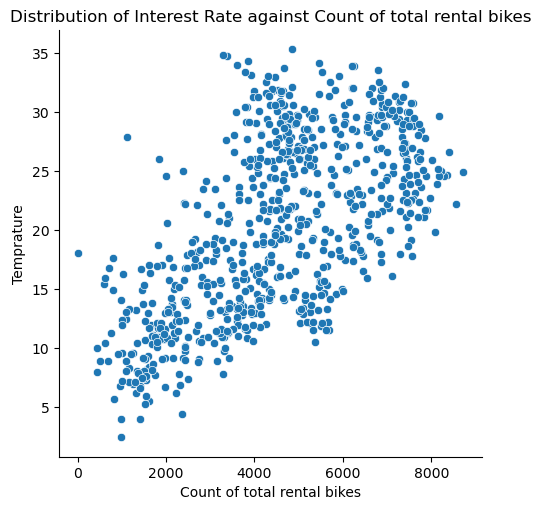

In [732]:
# Distribution of Temprature against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='temp')
plt.title('Distribution of Interest Rate against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Temprature')
plt.show()

<Figure size 1000x500 with 0 Axes>

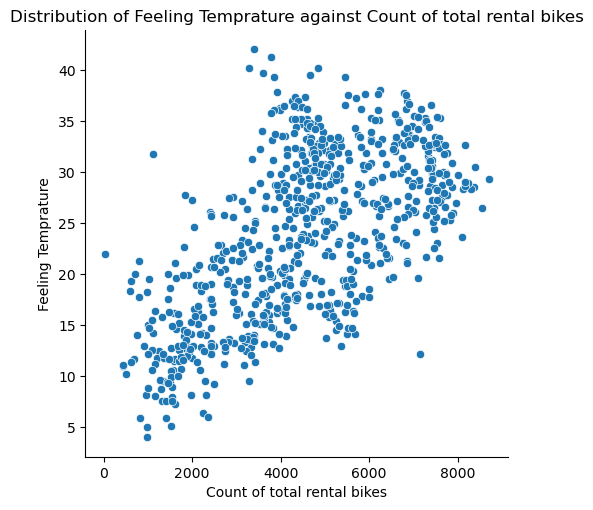

In [733]:
# Distribution of Feeling Temprature against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='atemp')
plt.title('Distribution of Feeling Temprature against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Feeling Temprature')
plt.show()

<Figure size 1000x500 with 0 Axes>

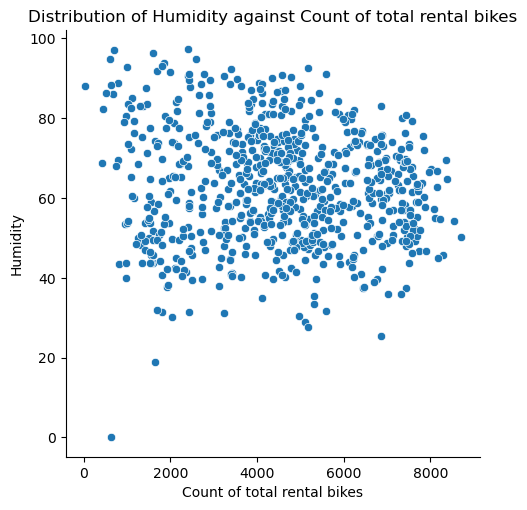

In [734]:

# Distribution of Humidity against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='hum')
plt.title('Distribution of Humidity against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Humidity')
plt.show()

<Figure size 1000x500 with 0 Axes>

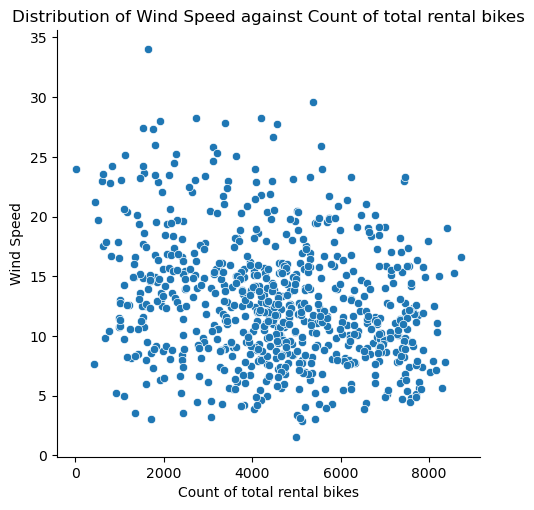

In [735]:

# Distribution of Wind Speed against Count of total rental bikes
plt.figure(figsize=(10,5))
sns.relplot(data=bike, x='cnt', y='windspeed')
plt.title('Distribution of Wind Speed against Count of total rental bikes')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Wind Speed')
plt.show()

### Visualising the Data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 5000x5000 with 0 Axes>

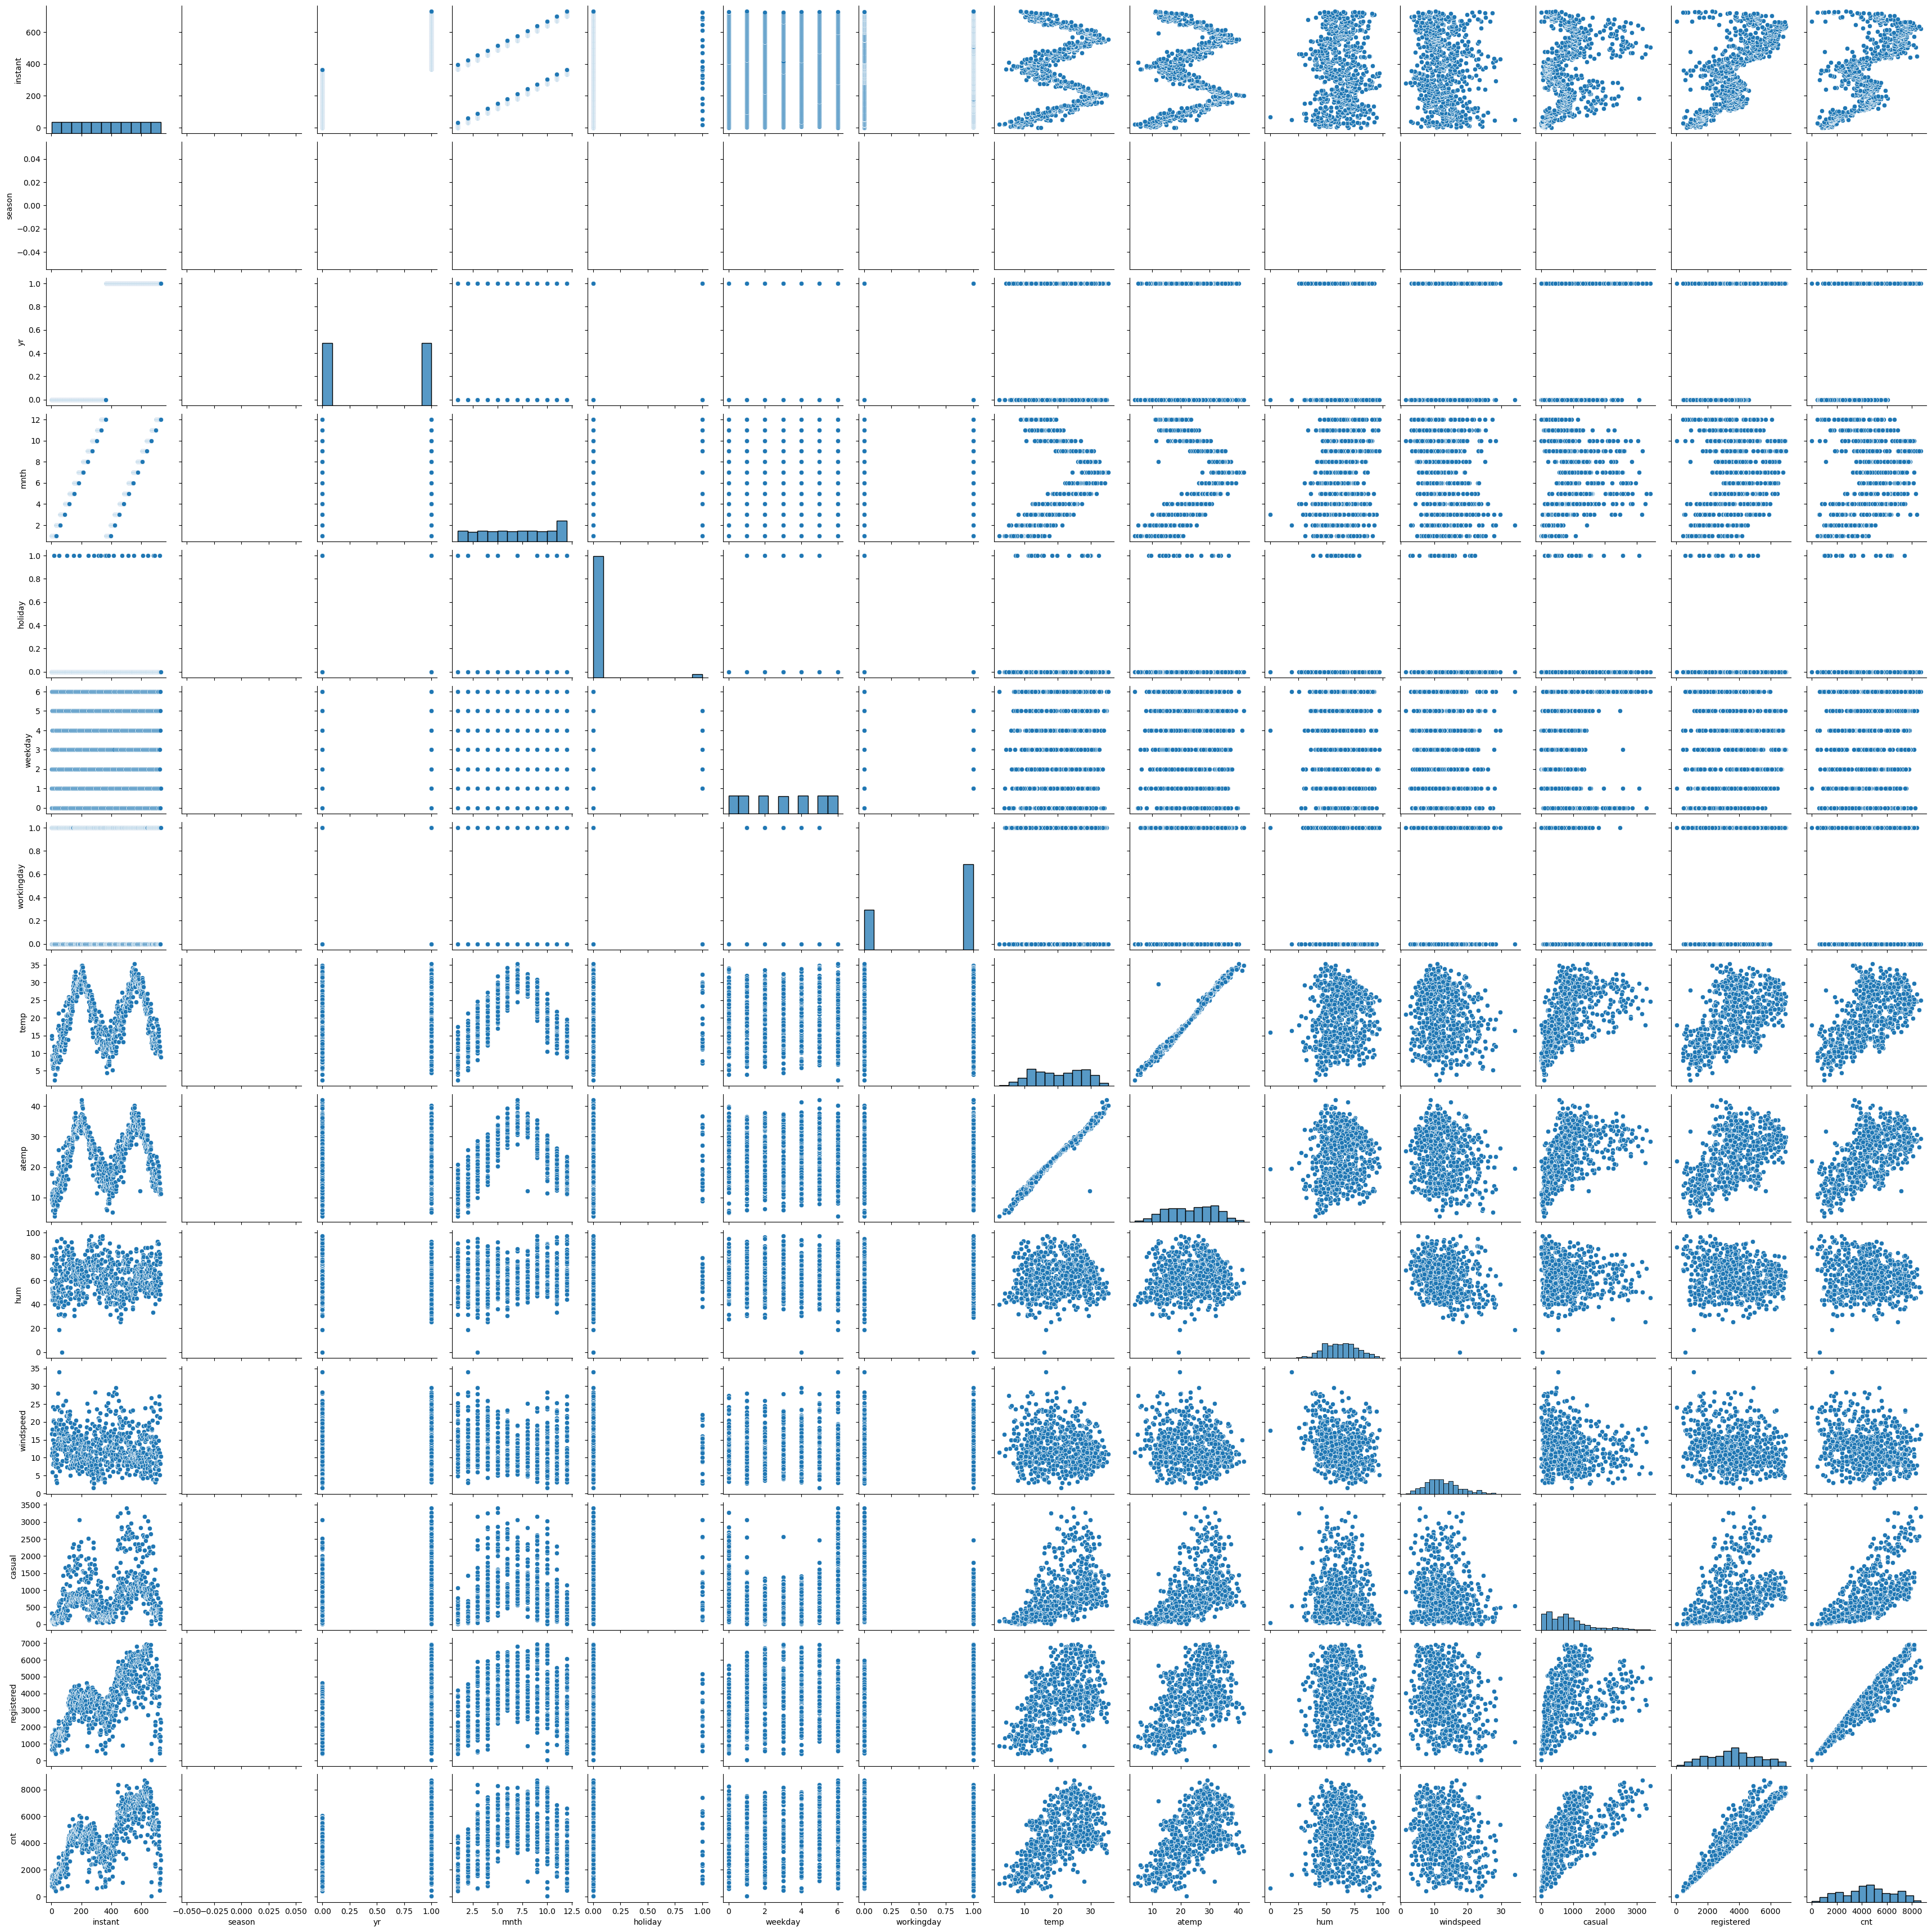

In [736]:
# Visualising the numrical variables
plt.figure(figsize = (50, 50))
sns.pairplot(df_bike)

plt.savefig("pairplot.png")
plt.show()
plt.close()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

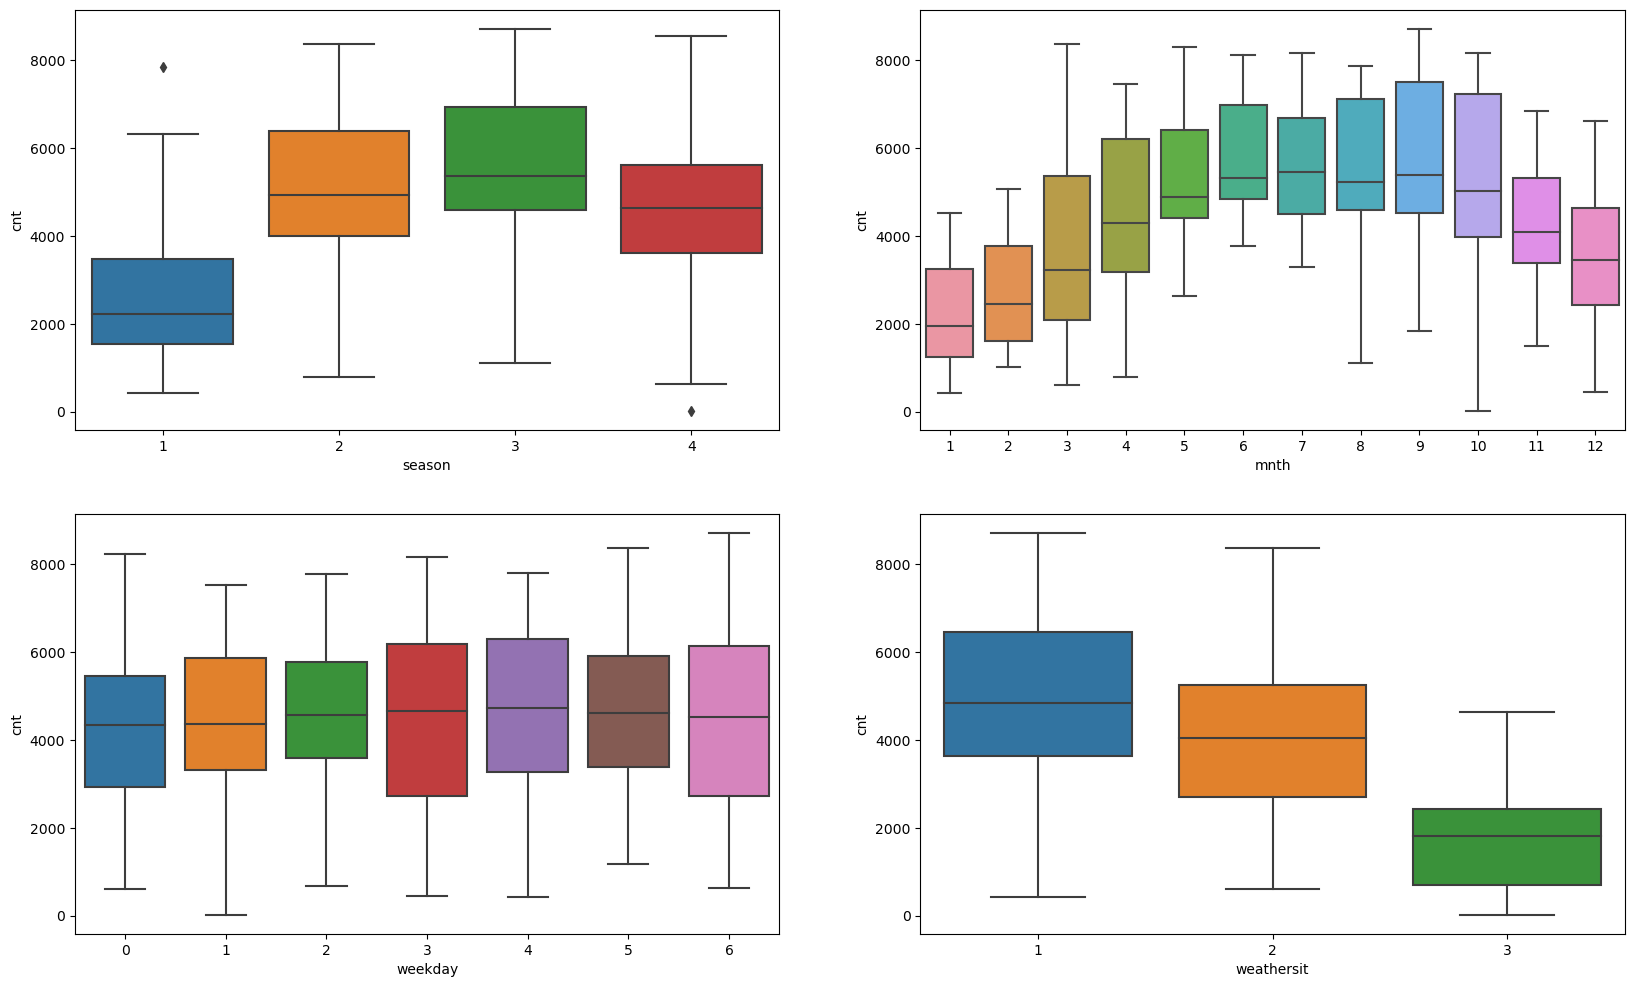

In [737]:
# visualising the categorical variables
plt.figure(figsize = (20, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(2, 2, 2)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(2, 2, 3)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(2, 2, 4)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

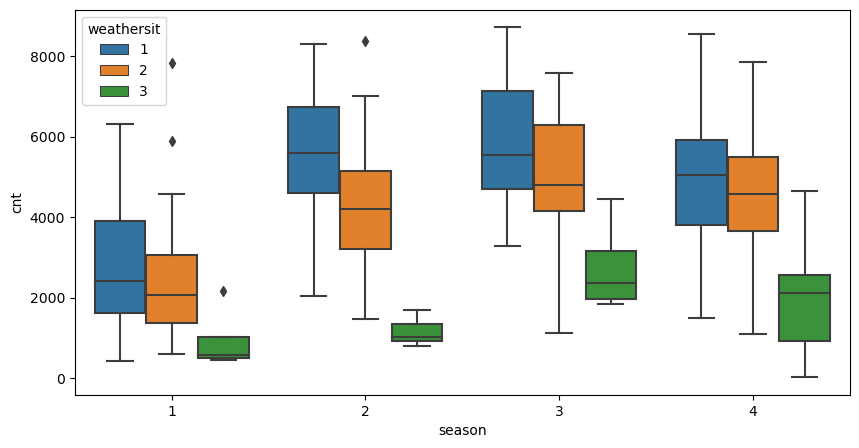

In [738]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike)
plt.show()

## Step 3: Data Preparation

- We can see that our dataset has some columns with values as string values.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [739]:
# Converte categorical columns into 'category' datatype
bike['season'] = bike['season'].astype('category')
bike['mnth'] = bike['mnth'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')
bike['weathersit'] = bike['weathersit'].astype('category')

In [740]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [741]:
# Converting 'season''s values into categorical string values
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  Spring   0    1        0       6           0          2  14.110847   
1  Spring   0    1        0       0           0          2  14.902598   
2  Spring   0    1        0       1           1          1   8.050924   
3  Spring   0    1        0       2           1          1   8.200000   
4  Spring   0    1        0       3           1          1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [742]:
# Converting 'weathersit''s values into categorical string values
bike['weathersit'] = bike['weathersit'].map({1:'Mixed clouds', 2:'Misty', 3:'Light precipitation', 4:'Heavy precipitation'})
bike.head()

season  yr mnth  holiday weekday  workingday    weathersit       temp  \
0  Spring   0    1        0       6           0         Misty  14.110847   
1  Spring   0    1        0       0           0         Misty  14.902598   
2  Spring   0    1        0       1           1  Mixed clouds   8.050924   
3  Spring   0    1        0       2           1  Mixed clouds   8.200000   
4  Spring   0    1        0       3           1  Mixed clouds   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [743]:
# Converting 'mnth''s values into categorical string values
import calendar

bike['mnth'] = bike['mnth'].apply(lambda x: calendar.month_abbr[x])
bike.head()

season  yr mnth  holiday weekday  workingday    weathersit       temp  \
0  Spring   0  Jan        0       6           0         Misty  14.110847   
1  Spring   0  Jan        0       0           0         Misty  14.902598   
2  Spring   0  Jan        0       1           1  Mixed clouds   8.050924   
3  Spring   0  Jan        0       2           1  Mixed clouds   8.200000   
4  Spring   0  Jan        0       3           1  Mixed clouds   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [744]:
# Converting 'weekday''s values into categorical string values
bike['weekday'] = bike['weekday'].map({0:'Sunday',1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thrusday', 5:'Friday', 6:'Sutarday'})
bike.head()

season  yr mnth  holiday    weekday  workingday    weathersit       temp  \
0  Spring   0  Jan        0   Sutarday           0         Misty  14.110847   
1  Spring   0  Jan        0     Sunday           0         Misty  14.902598   
2  Spring   0  Jan        0     Monday           1  Mixed clouds   8.050924   
3  Spring   0  Jan        0    Tuesday           1  Mixed clouds   8.200000   
4  Spring   0  Jan        0  Wednesday           1  Mixed clouds   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Dummy Variables

#### Dummy variables for 'weathersit'

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [745]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
season_dummies = pd.get_dummies(bike['season'])

In [746]:
season_dummies.head()

Spring  Summer  Fall  Winter
0       1       0     0       0
1       1       0     0       0
2       1       0     0       0
3       1       0     0       0
4       1       0     0       0

Now, you don't need four columns. You can drop the `season` column, as the seasons can be identified with just the last three columns where — 
- `000` will correspond to `spring`
- `001` will correspond to `summer`
- `010` will correspond to `fall`
- `100` will correspond to `winter`

In [747]:
# Let's drop the first column from season_dummies df using 'drop_fist = True'
season_dummies = pd.get_dummies(bike['season'], drop_first = True)

In [748]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, season_dummies], axis = 1)

In [749]:
# New let's see the head of our dataframe
bike.head()

season  yr mnth  holiday    weekday  workingday    weathersit       temp  \
0  Spring   0  Jan        0   Sutarday           0         Misty  14.110847   
1  Spring   0  Jan        0     Sunday           0         Misty  14.902598   
2  Spring   0  Jan        0     Monday           1  Mixed clouds   8.050924   
3  Spring   0  Jan        0    Tuesday           1  Mixed clouds   8.200000   
4  Spring   0  Jan        0  Wednesday           1  Mixed clouds   9.305237   

      atemp      hum  windspeed   cnt  Summer  Fall  Winter  
0  18.18125  80.5833  10.749882   985       0     0       0  
1  17.68695  69.6087  16.652113   801       0     0       0  
2   9.47025  43.7273  16.636703  1349       0     0       0  
3  10.60610  59.0435  10.739832  1562       0     0       0  
4  11.46350  43.6957  12.522300  1600       0     0       0

In [750]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [751]:
bike.head()

yr mnth  holiday    weekday  workingday    weathersit       temp     atemp  \
0   0  Jan        0   Sutarday           0         Misty  14.110847  18.18125   
1   0  Jan        0     Sunday           0         Misty  14.902598  17.68695   
2   0  Jan        0     Monday           1  Mixed clouds   8.050924   9.47025   
3   0  Jan        0    Tuesday           1  Mixed clouds   8.200000  10.60610   
4   0  Jan        0  Wednesday           1  Mixed clouds   9.305237  11.46350   

       hum  windspeed   cnt  Summer  Fall  Winter  
0  80.5833  10.749882   985       0     0       0  
1  69.6087  16.652113   801       0     0       0  
2  43.7273  16.636703  1349       0     0       0  
3  59.0435  10.739832  1562       0     0       0  
4  43.6957  12.522300  1600       0     0       0

#### Dummy variables for 'weathersit'
The variable `weathersit` has three levels. We need to convert these levels into integer as well. 

In [752]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummies'
weathersit_dummies = pd.get_dummies(bike['weathersit'])

In [753]:
weathersit_dummies.head()

Mixed clouds  Misty  Light precipitation
0             0      1                    0
1             0      1                    0
2             1      0                    0
3             1      0                    0
4             1      0                    0

Now, you don't need three columns. You can drop the `weathersit` column, as the weathersit can be identified with just the last two columns where — 
- `00` will correspond to `misty`
- `01` will correspond to `light precipitation`

In [754]:
# Let's drop the first column from weathersit_dummies df using 'drop_fist = True'
weathersit_dummies = pd.get_dummies(bike['weathersit'], drop_first = True)

In [755]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weathersit_dummies], axis = 1)

In [756]:
bike.head()

yr mnth  holiday    weekday  workingday    weathersit       temp     atemp  \
0   0  Jan        0   Sutarday           0         Misty  14.110847  18.18125   
1   0  Jan        0     Sunday           0         Misty  14.902598  17.68695   
2   0  Jan        0     Monday           1  Mixed clouds   8.050924   9.47025   
3   0  Jan        0    Tuesday           1  Mixed clouds   8.200000  10.60610   
4   0  Jan        0  Wednesday           1  Mixed clouds   9.305237  11.46350   

       hum  windspeed   cnt  Summer  Fall  Winter  Misty  Light precipitation  
0  80.5833  10.749882   985       0     0       0      1                    0  
1  69.6087  16.652113   801       0     0       0      1                    0  
2  43.7273  16.636703  1349       0     0       0      0                    0  
3  59.0435  10.739832  1562       0     0       0      0                    0  
4  43.6957  12.522300  1600       0     0       0      0                    0

In [757]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [758]:
bike.head()

yr mnth  holiday    weekday  workingday       temp     atemp      hum  \
0   0  Jan        0   Sutarday           0  14.110847  18.18125  80.5833   
1   0  Jan        0     Sunday           0  14.902598  17.68695  69.6087   
2   0  Jan        0     Monday           1   8.050924   9.47025  43.7273   
3   0  Jan        0    Tuesday           1   8.200000  10.60610  59.0435   
4   0  Jan        0  Wednesday           1   9.305237  11.46350  43.6957   

   windspeed   cnt  Summer  Fall  Winter  Misty  Light precipitation  
0  10.749882   985       0     0       0      1                    0  
1  16.652113   801       0     0       0      1                    0  
2  16.636703  1349       0     0       0      0                    0  
3  10.739832  1562       0     0       0      0                    0  
4  12.522300  1600       0     0       0      0                    0

#### Dummy variables for 'mnth'
The variable `mnth` has Twelve levels. We need to convert these levels into integer as well. 

In [759]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummies'
mnth_dummies = pd.get_dummies(bike['mnth'])

In [760]:
mnth_dummies.head()

Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0    1    0    0    0    0    0    0    0    0    0    0    0
1    1    0    0    0    0    0    0    0    0    0    0    0
2    1    0    0    0    0    0    0    0    0    0    0    0
3    1    0    0    0    0    0    0    0    0    0    0    0
4    1    0    0    0    0    0    0    0    0    0    0    0

In [761]:
# Let's drop the first column from mnth_dummies df using 'drop_fist = True'
mnth_dummies = pd.get_dummies(bike['mnth'], drop_first = True)

In [762]:
mnth_dummies.head()

Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0    0    0    0    0    0    0    0    0    0    0    0
1    0    0    0    0    0    0    0    0    0    0    0
2    0    0    0    0    0    0    0    0    0    0    0
3    0    0    0    0    0    0    0    0    0    0    0
4    0    0    0    0    0    0    0    0    0    0    0

In [763]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, mnth_dummies], axis = 1)

In [764]:
bike.head()

yr mnth  holiday    weekday  workingday       temp     atemp      hum  \
0   0  Jan        0   Sutarday           0  14.110847  18.18125  80.5833   
1   0  Jan        0     Sunday           0  14.902598  17.68695  69.6087   
2   0  Jan        0     Monday           1   8.050924   9.47025  43.7273   
3   0  Jan        0    Tuesday           1   8.200000  10.60610  59.0435   
4   0  Jan        0  Wednesday           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  
0  10.749882   985  ...    0    0    0    0    0    0    0    0    0    0  
1  16.652113   801  ...    0    0    0    0    0    0    0    0    0    0  
2  16.636703  1349  ...    0    0    0    0    0    0    0    0    0    0  
3  10.739832  1562  ...    0    0    0    0    0    0    0    0    0    0  
4  12.522300  1600  ...    0    0    0    0    0    0    0    0    0    0  

[5 rows x 26 columns]

In [765]:
# Drop 'mnth' as we have created the dummies for it

bike.drop(['mnth'], axis = 1, inplace = True)

In [766]:
bike.head()

yr  holiday    weekday  workingday       temp     atemp      hum  \
0   0        0   Sutarday           0  14.110847  18.18125  80.5833   
1   0        0     Sunday           0  14.902598  17.68695  69.6087   
2   0        0     Monday           1   8.050924   9.47025  43.7273   
3   0        0    Tuesday           1   8.200000  10.60610  59.0435   
4   0        0  Wednesday           1   9.305237  11.46350  43.6957   

   windspeed   cnt  Summer  ...  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  \
0  10.749882   985       0  ...    0    0    0    0    0    0    0    0    0   
1  16.652113   801       0  ...    0    0    0    0    0    0    0    0    0   
2  16.636703  1349       0  ...    0    0    0    0    0    0    0    0    0   
3  10.739832  1562       0  ...    0    0    0    0    0    0    0    0    0   
4  12.522300  1600       0  ...    0    0    0    0    0    0    0    0    0   

   Dec  
0    0  
1    0  
2    0  
3    0  
4    0  

[5 rows x 25 columns]

#### Dummy variables for 'weekday'
The variable `weekday` has Seven levels. We need to convert these levels into integer as well. 

In [767]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummies'
weekday_dummies = pd.get_dummies(bike['weekday'])

In [768]:
weekday_dummies.head()

Sunday  Monday  Tuesday  Wednesday  Thrusday  Friday  Sutarday
0       0       0        0          0         0       0         1
1       1       0        0          0         0       0         0
2       0       1        0          0         0       0         0
3       0       0        1          0         0       0         0
4       0       0        0          1         0       0         0

In [769]:
# Let's drop the first column from weekday_dummies df using 'drop_fist = True'
weekday_dummies = pd.get_dummies(bike['weekday'], drop_first = True)

In [770]:
weekday_dummies.head()

Monday  Tuesday  Wednesday  Thrusday  Friday  Sutarday
0       0        0          0         0       0         1
1       0        0          0         0       0         0
2       1        0          0         0       0         0
3       0        1          0         0       0         0
4       0        0          1         0       0         0

In [771]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weekday_dummies], axis = 1)

In [772]:
bike.head()

yr  holiday    weekday  workingday       temp     atemp      hum  \
0   0        0   Sutarday           0  14.110847  18.18125  80.5833   
1   0        0     Sunday           0  14.902598  17.68695  69.6087   
2   0        0     Monday           1   8.050924   9.47025  43.7273   
3   0        0    Tuesday           1   8.200000  10.60610  59.0435   
4   0        0  Wednesday           1   9.305237  11.46350  43.6957   

   windspeed   cnt  Summer  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  \
0  10.749882   985       0  ...    0    0    0    0       0        0   
1  16.652113   801       0  ...    0    0    0    0       0        0   
2  16.636703  1349       0  ...    0    0    0    0       1        0   
3  10.739832  1562       0  ...    0    0    0    0       0        1   
4  12.522300  1600       0  ...    0    0    0    0       0        0   

   Wednesday  Thrusday  Friday  Sutarday  
0          0         0       0         1  
1          0         0       0         0  
2          0         0       0         0  
3          0         0       0         0  
4          1         0       0         0  

[5 rows x 31 columns]

In [773]:
# Drop 'weekday' as we have created the dummies for it

bike.drop(['weekday'], axis = 1, inplace = True)

In [774]:
bike.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   Summer  Fall  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  Wednesday  \
0       0     0  ...    0    0    0    0       0        0          0   
1       0     0  ...    0    0    0    0       0        0          0   
2       0     0  ...    0    0    0    0       1        0          0   
3       0     0  ...    0    0    0    0       0        1          0   
4       0     0  ...    0    0    0    0       0        0          1   

   Thrusday  Friday  Sutarday  
0         0       0         1  
1         0       0         0  
2         0       0         0  
3         0       0         0  
4         0       0         0  

[5 rows x 30 columns]

### Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [775]:

# We specify this so that the train and test data set always have the same rows, respectivly
np.random.seed(0)

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 

We will use MinMax scaling.

In [776]:
# Import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [777]:
# Instantiate an object of MinMaxScaler
scaler = MinMaxScaler()

In [778]:
# Apply scaler() to all the columns except  the 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [779]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  Summer  Fall  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  \
653  0.864243       0     0  ...    0    1    0    0       0        1   
576  0.827658       0     1  ...    0    0    0    0       0        1   
426  0.465255       0     0  ...    0    0    0    0       0        0   
728  0.204096       0     0  ...    0    0    0    1       0        0   
482  0.482973       1     0  ...    0    0    0    0       0        0   

     Wednesday  Thrusday  Friday  Sutarday  
653          0         0       0         0  
576          0         0       0         0  
426          0         0       0         1  
728          0         0       0         0  
482          0         0       0         1  

[5 rows x 30 columns]

In [780]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      Summer        Fall  ...         Sep  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.245098    0.262745  ...    0.080392   
std      0.169797    0.224593    0.430568    0.440557  ...    0.272166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Oct         Nov         Dec      Monday     Tuesday   Wednesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.086275    0.084314    0.150980    0.131373    0.158824   
std      0.281045    0.281045    0.278131    0.358381    0.338139    0.365870   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Thrusday      Friday    Sutarday  
count  510.000000  510.000000  510.000000  
mean     0.133333    0.127451    0.154902  
std      0.340268    0.333805    0.362166  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

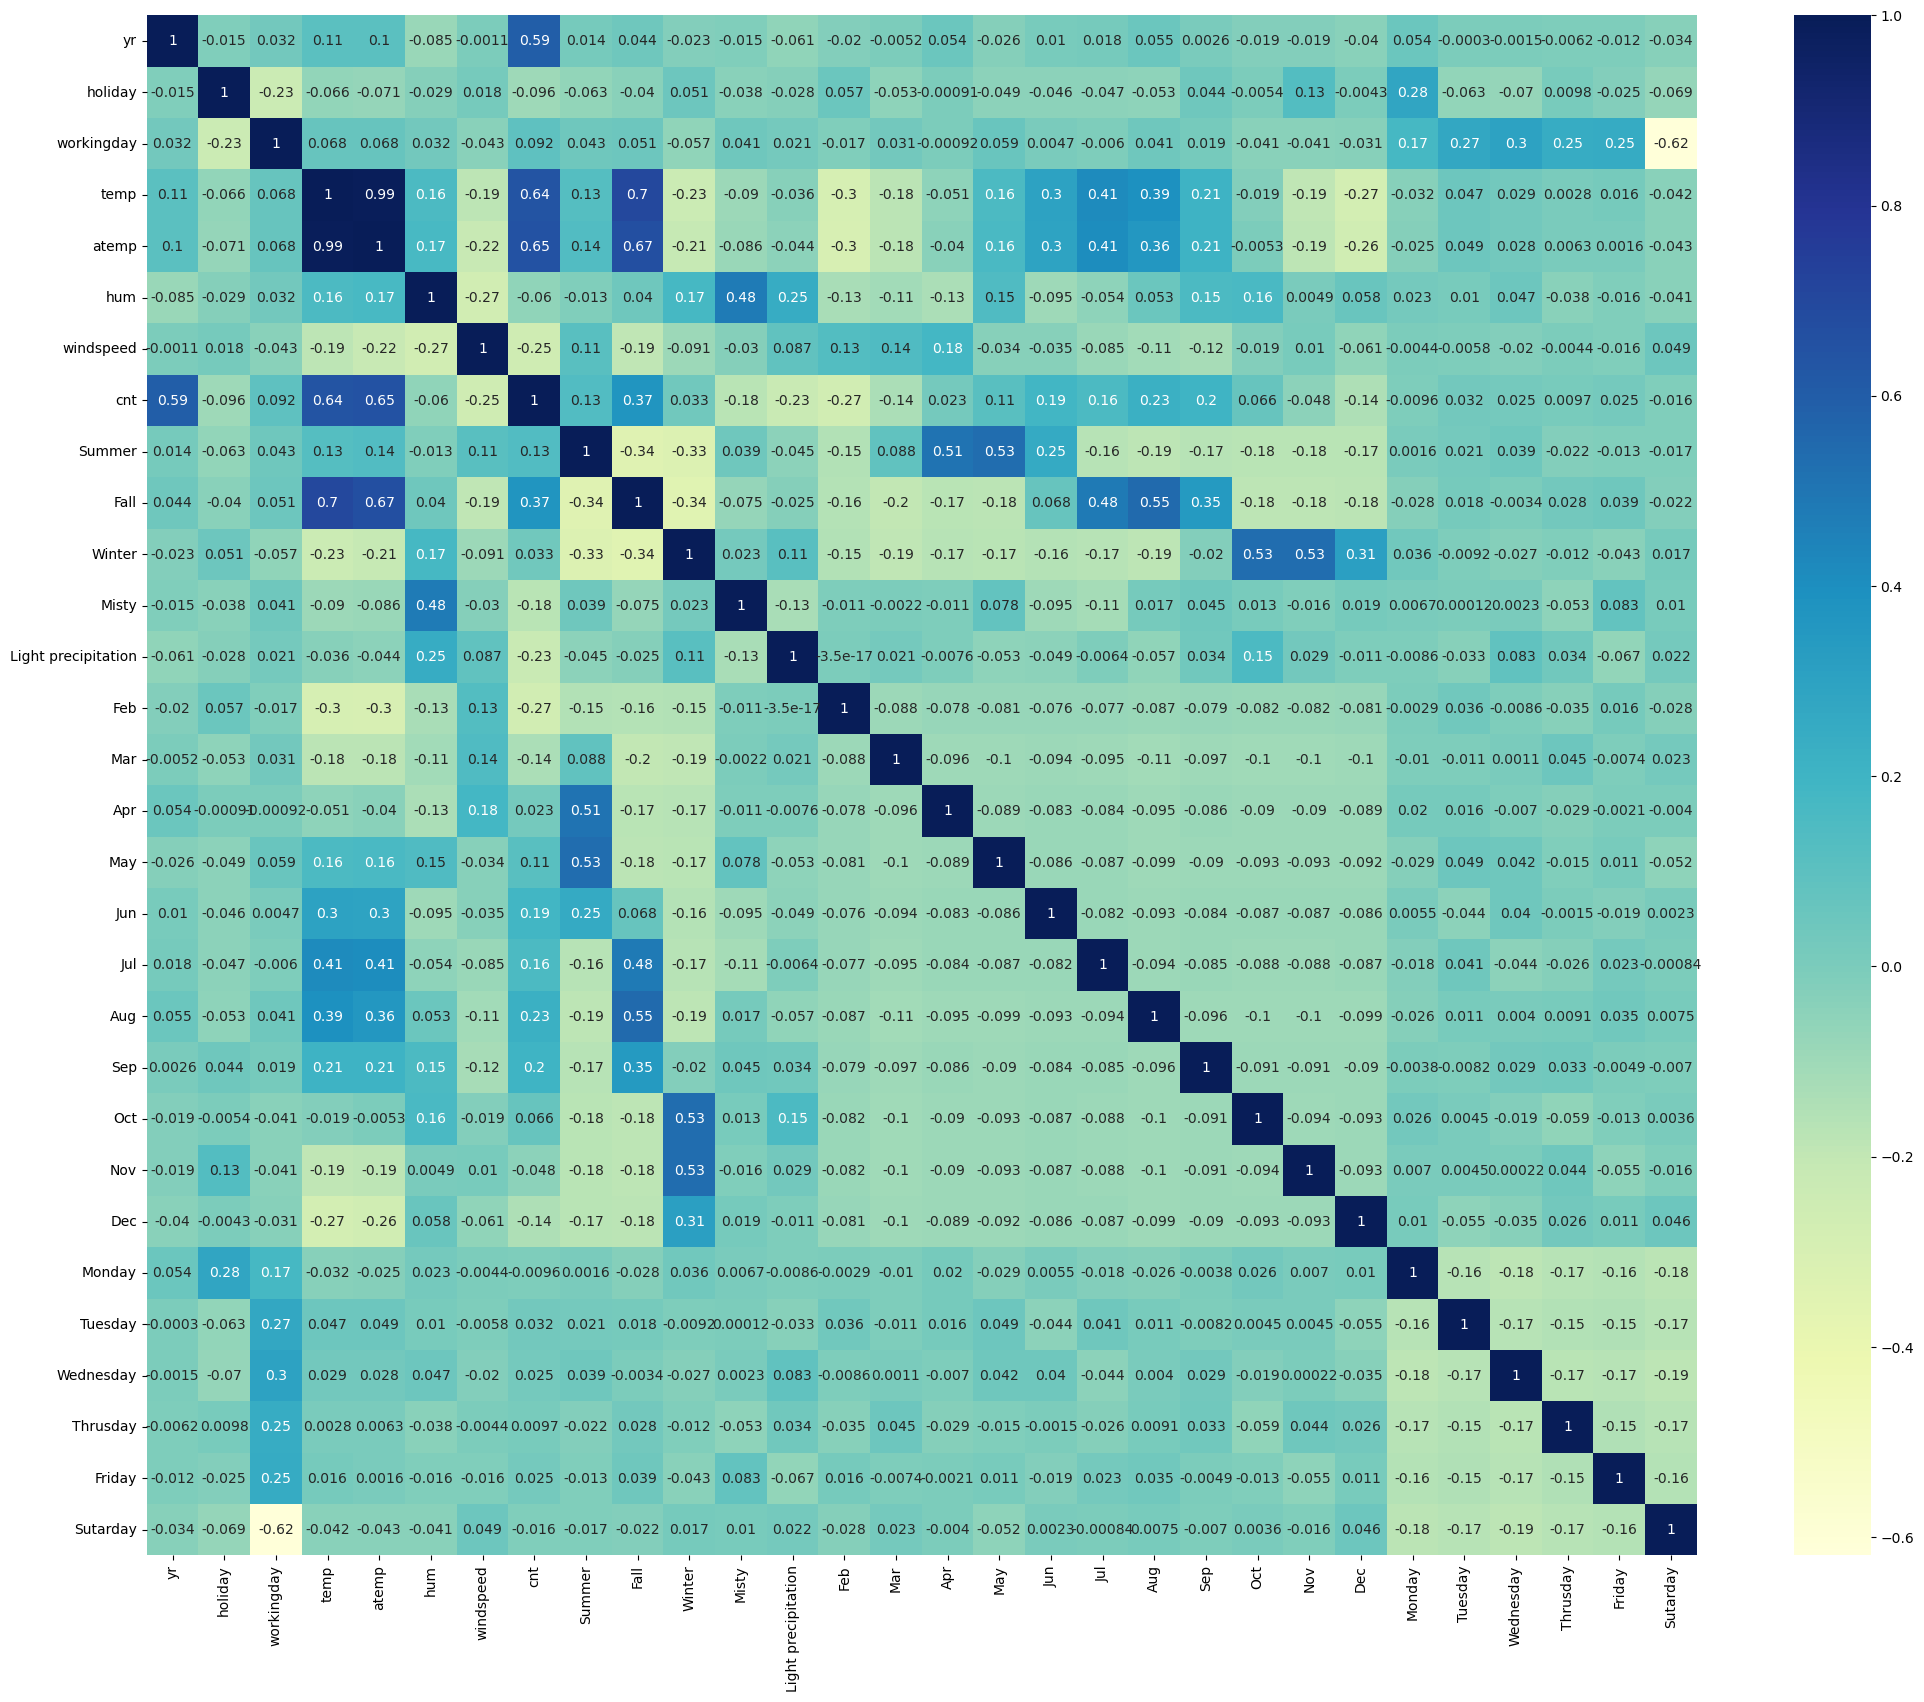

In [781]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot= True, cmap='YlGnBu')
plt.show()

### Dividing into X and Y sets for the model building

In [782]:
y_train = df_train.pop('cnt')
X_train = df_train

In [783]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  Summer  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794       0   
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       0   
728   1        0           0  0.245101  0.200348  0.498067   0.663106       0   
482   1        0           0  0.395666  0.391735  0.504508   0.188475       1   

     Fall  Winter  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  Wednesday  \
653     0       1  ...    0    1    0    0       0        1          0   
576     1       0  ...    0    0    0    0       0        1          0   
426     0       0  ...    0    0    0    0       0        0          0   
728     0       0  ...    0    0    0    1       0        0          0   
482     0       0  ...    0    0    0    0       0        0          0   

     Thrusday  Friday  Sutarday  
653         0       0         0  
576         0       0         0  
426         0       0         1  
728         0       0         0  
482         0       0         1  

[5 rows x 29 columns]

In [784]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [824]:
# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [825]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 2),
 ('Winter', True, 1),
 ('Misty', True, 1),
 ('Light precipitation', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 3),
 ('Apr', False, 5),
 ('May', False, 4),
 ('Jun', False, 6),
 ('Jul', False, 10),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 8),
 ('Dec', False, 9),
 ('Monday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Thrusday', True, 1),
 ('Friday', True, 1),
 ('Sutarday', True, 1)]

In [826]:
# Remove columns using rfe.support_
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Misty', 'Light precipitation', 'Aug', 'Sep', 'Oct',
       'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Sutarday'],
      dtype='object')

In [827]:
# List removed columns
X_train.columns[~rfe.support_]

Index(['Fall', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [828]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [829]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [830]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [831]:
# Let's see the summary of the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.67e-187
Time:                        12:28:19   Log-Likelihood:                 520.55
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1918      0.029      6.634      0.000       0.135       0.249
yr                      0.2298      0.008     28.691      0.000       0.214       0.245
holiday                -0.0483      0.023     -2.067      0.039      -0.094      -0.002
workingday              0.0451      0.009      4.817      0.000       0.027       0.063
temp                    0.4975      0.130      3.829      0.000       0.242       0.753
atemp                   0.0345      0.137      0.251      0.802      -0.235       0.304
hum                    -0.1666      0.037     -4.482      0.000      -0.240      -0.094
windspeed              -0.1837      0.026     -7.129      0.000      -0.234      -0.133
Summer                  0.1041      0.011      9.622      0.000       0.083       0.125
Winter                  0.1350      0.012     11.254      0.000       0.111       0.159
Misty                  -0.0591      0.010     -5.670      0.000      -0.080      -0.039
Light precipitation    -0.2493      0.026     -9.491      0.000      -0.301      -0.198
Aug                     0.0563      0.016      3.454      0.001       0.024       0.088
Sep                     0.1251      0.016      7.738      0.000       0.093       0.157
Oct                     0.0414      0.017      2.407      0.016       0.008       0.075
Monday                 -0.0107      0.010     -1.094      0.275      -0.030       0.008
Tuesday                -0.0085      0.011     -0.759      0.448      -0.030       0.013
Wednesday               0.0043      0.010      0.408      0.684      -0.016       0.025
Thrusday                0.0012      0.011      0.107      0.915      -0.020       0.023
Friday                  0.0104      0.011      0.929      0.353      -0.012       0.033
Sutarday                0.0531      0.015      3.651      0.000       0.025       0.082
==============================================================================
Omnibus:                       72.920   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.726
Skew:                          -0.734   Prob(JB):                     5.70e-40
Kurtosis:                       5.520   Cond. No.                     1.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.18e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [832]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
15               Monday    inf
2               holiday    inf
3            workingday    inf
19               Friday    inf
18             Thrusday    inf
17            Wednesday    inf
16              Tuesday    inf
4                  temp  55.39
5                 atemp  54.51
0                 const  53.85
6                   hum   1.89
20             Sutarday   1.79
9                Winter   1.74
10                Misty   1.58
14                  Oct   1.50
12                  Aug   1.49
8                Summer   1.40
11  Light precipitation   1.27
13                  Sep   1.25
7             windspeed   1.23
1                    yr   1.03

In [833]:
# dropping holiday since its vif is inf

X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

#### Model 2

In [834]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.67e-187
Time:                        12:28:31   Log-Likelihood:                 520.55
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1918      0.029      6.634      0.000       0.135       0.249
yr                      0.2298      0.008     28.691      0.000       0.214       0.245
workingday              0.0934      0.026      3.545      0.000       0.042       0.145
temp                    0.4975      0.130      3.829      0.000       0.242       0.753
atemp                   0.0345      0.137      0.251      0.802      -0.235       0.304
hum                    -0.1666      0.037     -4.482      0.000      -0.240      -0.094
windspeed              -0.1837      0.026     -7.129      0.000      -0.234      -0.133
Summer                  0.1041      0.011      9.622      0.000       0.083       0.125
Winter                  0.1350      0.012     11.254      0.000       0.111       0.159
Misty                  -0.0591      0.010     -5.670      0.000      -0.080      -0.039
Light precipitation    -0.2493      0.026     -9.491      0.000      -0.301      -0.198
Aug                     0.0563      0.016      3.454      0.001       0.024       0.088
Sep                     0.1251      0.016      7.738      0.000       0.093       0.157
Oct                     0.0414      0.017      2.407      0.016       0.008       0.075
Monday                 -0.0590      0.027     -2.175      0.030      -0.112      -0.006
Tuesday                -0.0568      0.030     -1.874      0.062      -0.116       0.003
Wednesday              -0.0440      0.030     -1.469      0.142      -0.103       0.015
Thrusday               -0.0471      0.030     -1.588      0.113      -0.105       0.011
Friday                 -0.0379      0.030     -1.257      0.209      -0.097       0.021
Sutarday                0.0531      0.015      3.651      0.000       0.025       0.082
==============================================================================
Omnibus:                       72.920   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.726
Skew:                          -0.734   Prob(JB):                     5.70e-40
Kurtosis:                       5.520   Cond. No.                         86.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [835]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3                  temp  55.39
4                 atemp  54.51
0                 const  53.85
2            workingday   9.78
16            Wednesday   7.73
15              Tuesday   6.74
17             Thrusday   6.56
18               Friday   6.50
14               Monday   6.07
5                   hum   1.89
19             Sutarday   1.79
8                Winter   1.74
9                 Misty   1.58
13                  Oct   1.50
11                  Aug   1.49
7                Summer   1.40
10  Light precipitation   1.27
12                  Sep   1.25
6             windspeed   1.23
1                    yr   1.03

In [836]:
# dropping temp since its vif > 5

X_train_rfe = X_train_rfe.drop(['temp'], axis=1)

#### Model 3

In [837]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.1
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          3.89e-185
Time:                        12:29:38   Log-Likelihood:                 513.03
No. Observations:                 510   AIC:                            -988.1
Df Residuals:                     491   BIC:                            -907.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1900      0.029      6.484      0.000       0.132       0.248
yr                      0.2306      0.008     28.421      0.000       0.215       0.247
workingday              0.0887      0.027      3.327      0.001       0.036       0.141
atemp                   0.5517      0.024     23.413      0.000       0.505       0.598
hum                    -0.1697      0.038     -4.503      0.000      -0.244      -0.096
windspeed              -0.1670      0.026     -6.486      0.000      -0.218      -0.116
Summer                  0.1021      0.011      9.320      0.000       0.081       0.124
Winter                  0.1296      0.012     10.727      0.000       0.106       0.153
Misty                  -0.0599      0.011     -5.665      0.000      -0.081      -0.039
Light precipitation    -0.2425      0.027     -9.126      0.000      -0.295      -0.190
Aug                     0.0694      0.016      4.297      0.000       0.038       0.101
Sep                     0.1296      0.016      7.927      0.000       0.097       0.162
Oct                     0.0416      0.017      2.388      0.017       0.007       0.076
Monday                 -0.0563      0.027     -2.048      0.041      -0.110      -0.002
Tuesday                -0.0524      0.031     -1.707      0.088      -0.113       0.008
Wednesday              -0.0389      0.030     -1.281      0.201      -0.099       0.021
Thrusday               -0.0439      0.030     -1.459      0.145      -0.103       0.015
Friday                 -0.0291      0.030     -0.957      0.339      -0.089       0.031
Sutarday                0.0530      0.015      3.594      0.000       0.024       0.082
==============================================================================
Omnibus:                       66.001   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.139
Skew:                          -0.635   Prob(JB):                     7.65e-40
Kurtosis:                       5.620   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [838]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
0                 const  53.84
2            workingday   9.76
15            Wednesday   7.72
14              Tuesday   6.73
16             Thrusday   6.56
17               Friday   6.46
13               Monday   6.07
4                   hum   1.89
18             Sutarday   1.79
7                Winter   1.71
8                 Misty   1.58
3                 atemp   1.57
12                  Oct   1.50
10                  Aug   1.42
6                Summer   1.39
9   Light precipitation   1.26
11                  Sep   1.24
5             windspeed   1.20
1                    yr   1.03

In [839]:
# dropping workingday since its vif > 5

X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

#### Model 4

In [842]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          7.13e-184
Time:                        12:31:14   Log-Likelihood:                 507.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     492   BIC:                            -902.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1885      0.030      6.369      0.000       0.130       0.247
yr                      0.2313      0.008     28.230      0.000       0.215       0.247
atemp                   0.5550      0.024     23.337      0.000       0.508       0.602
hum                    -0.1706      0.038     -4.483      0.000      -0.245      -0.096
windspeed              -0.1690      0.026     -6.500      0.000      -0.220      -0.118
Summer                  0.1037      0.011      9.380      0.000       0.082       0.125
Winter                  0.1285      0.012     10.535      0.000       0.105       0.152
Misty                  -0.0583      0.011     -5.462      0.000      -0.079      -0.037
Light precipitation    -0.2387      0.027     -8.901      0.000      -0.291      -0.186
Aug                     0.0708      0.016      4.337      0.000       0.039       0.103
Sep                     0.1273      0.017      7.712      0.000       0.095       0.160
Oct                     0.0430      0.018      2.444      0.015       0.008       0.078
Monday                  0.0208      0.015      1.394      0.164      -0.009       0.050
Tuesday                 0.0361      0.015      2.336      0.020       0.006       0.066
Wednesday               0.0495      0.015      3.338      0.001       0.020       0.079
Thrusday                0.0423      0.015      2.731      0.007       0.012       0.073
Friday                  0.0580      0.016      3.696      0.000       0.027       0.089
Sutarday                0.0529      0.015      3.553      0.000       0.024       0.082
==============================================================================
Omnibus:                       77.660   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.693
Skew:                          -0.727   Prob(JB):                     1.62e-49
Kurtosis:                       5.908   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [843]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
0                 const  53.83
3                   hum   1.89
14            Wednesday   1.81
17             Sutarday   1.79
12               Monday   1.75
6                Winter   1.71
15             Thrusday   1.70
13              Tuesday   1.68
16               Friday   1.68
7                 Misty   1.58
2                 atemp   1.56
11                  Oct   1.50
9                   Aug   1.42
5                Summer   1.39
8   Light precipitation   1.26
10                  Sep   1.24
4             windspeed   1.20
1                    yr   1.03

### Residual Analysis of the train data

In [844]:
y_train_pred = lm_4.predict(X_train_lm)

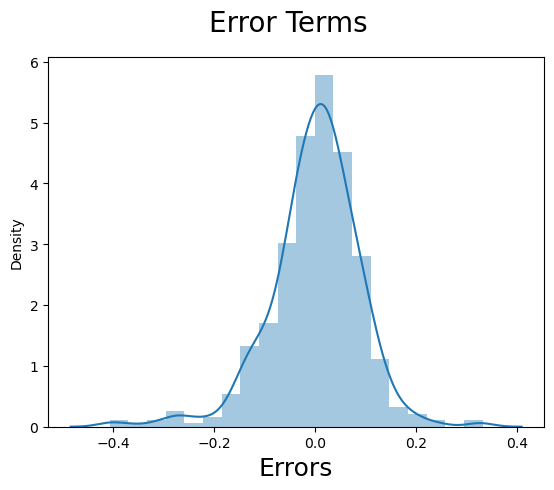

In [845]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()